<a href="https://colab.research.google.com/github/smwaingeni-ai/AgriX-AfricaDeepTech2025/blob/main/notebooks%20/qr_demo_and_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Install Dependencies**

In [7]:
!pip install opencv-python-headless --quiet


**Step 2: Import Libraries**

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


** Step 3: Re-clone GitHub Repo (Optional Clean Start)**

In [9]:
# Remove old folder if it exists
!rm -rf AgriX-AfricaDeepTech2025

# Clone repo again
!git clone https://github.com/smwaingeni-ai/AgriX-AfricaDeepTech2025.git

# Change to repo directory
%cd AgriX-AfricaDeepTech2025


Cloning into 'AgriX-AfricaDeepTech2025'...
remote: Enumerating objects: 599, done.
remote: Counting objects: 100% (328/328), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 599 (delta 191), reused 81 (delta 81), pack-reused 271 (from 2)
Receiving objects: 100% (599/599), 24.40 MiB | 14.99 MiB/s, done.
Resolving deltas: 100% (230/230), done.
/content/AgriX-AfricaDeepTech2025/AgriX-AfricaDeepTech2025


**Step 4: Set Path to TFLite Model**

In [10]:
# Path to the trained TFLite model
model_path = "/content/AgriX-AfricaDeepTech2025/prototype/tflite_model/crop_disease_model.tflite"


**Step 5: Load TFLite Model**

In [11]:
# Load and allocate tensors
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input shape
print("📦 Input shape:", input_details[0]['shape'])


📦 Input shape: [  1 128 128   3]


**Step 6: Define Class Names**

In [12]:
class_names = ['Healthy', 'Maize___Leaf_Spot', 'Tomato___Bacterial_spot']


**Step 7: Define Image Preprocessing Function**

In [13]:
def load_image(image_path, target_size=(128, 128)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img).astype(np.float32) / 255.0
    return np.expand_dims(img_array, axis=0)  # Add batch dimension


**Step 8: Load Image and Run Inference**

In [16]:
# Example test image path
img_path = "/content/AgriX-AfricaDeepTech2025/data/crops/plantvillage_subset/Healthy/Healthy_6.jpg"

# Preprocess image
input_data = load_image(img_path)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)
confidence = np.max(output_data)


**Step 9: Display Prediction and Image**

🧠 Predicted class index: 0
📛 Class name: Healthy
🔍 Confidence: 35.64 %


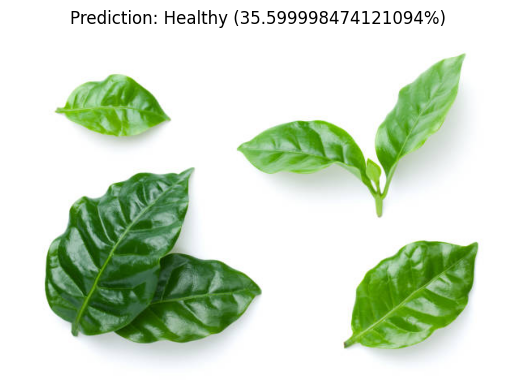

In [17]:
print("🧠 Predicted class index:", predicted_class)
print("📛 Class name:", class_names[predicted_class])
print("🔍 Confidence:", round(confidence * 100, 2), "%")

# Show image with predicted label
plt.imshow(Image.open(img_path))
plt.axis('off')
plt.title(f"Prediction: {class_names[predicted_class]} ({round(confidence * 100, 1)}%)")
plt.show()
